<a href="https://colab.research.google.com/github/weibb123/Student_performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencies Import


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


## Dataset Import

In [4]:
pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [11]:
# Access table in the JSON Object
student_performance['data']['original']


# turn into df format for easy use later on
df = pd.DataFrame(data=student_performance['data']['original']
)

In [18]:
# head of 5 examples
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [19]:
# check the columns
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Exploration Data Analysis

In [14]:
# dataset summary
summary = {
    'Number of Records': df.shape[0],
    'Number of Columns': df.shape[1],
    'Missing Values': df.isnull().sum(),
    'Numerical Columns Summary': df.describe()
}

summary

{'Number of Records': 649,
 'Number of Columns': 33,
 'Missing Values': school        0
 sex           0
 age           0
 address       0
 famsize       0
 Pstatus       0
 Medu          0
 Fedu          0
 Mjob          0
 Fjob          0
 reason        0
 guardian      0
 traveltime    0
 studytime     0
 failures      0
 schoolsup     0
 famsup        0
 paid          0
 activities    0
 nursery       0
 higher        0
 internet      0
 romantic      0
 famrel        0
 freetime      0
 goout         0
 Dalc          0
 Walc          0
 health        0
 absences      0
 G1            0
 G2            0
 G3            0
 dtype: int64,
 'Numerical Columns Summary':               age        Medu        Fedu  traveltime   studytime    failures  \
 count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
 mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
 std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235

many explorations can be done on this dataset, we will focus on two visualizations since it will be helpful when making our hypothesis

1. final_grade between male and female students

2. Family Relationships and Academic Success

#### Final grade(G3) between male and female students

<Axes: xlabel='sex', ylabel='G3'>

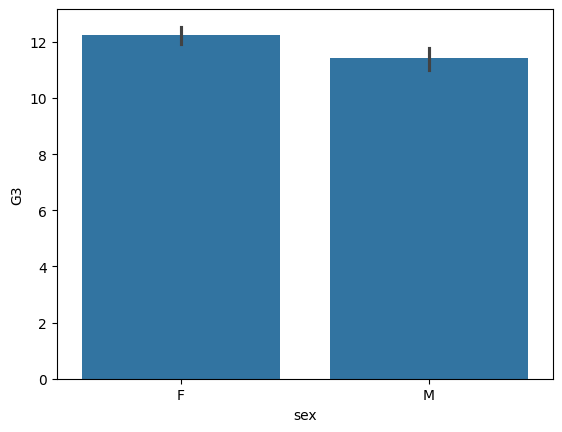

In [28]:
sns.barplot(data=df, x="sex", y="G3")

Based on the plot, female students have a higher final grade than male students

#### Family Relationships and Academic Success


In [30]:
# family relationship is in order of 1-5, where 5 = healthiest family relationship
df['famrel']

0      4
1      5
2      4
3      3
4      4
      ..
644    5
645    4
646    1
647    2
648    4
Name: famrel, Length: 649, dtype: int64

<Axes: xlabel='famrel', ylabel='G3'>

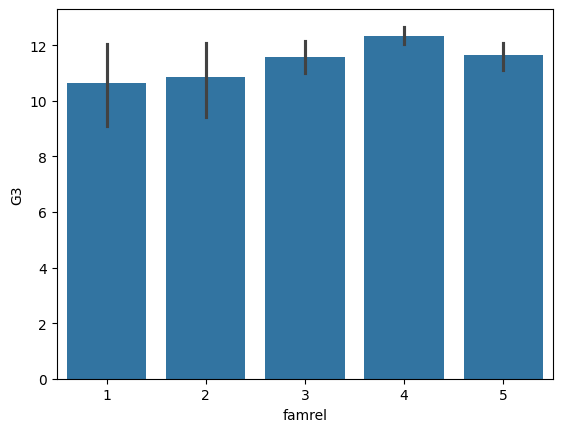

In [31]:
sns.barplot(data=df, x="famrel", y="G3")

Based on the plot, it seems like healthier family relationship has a slightly benefit on student's performance.

## Hypothesis Testing


#### Gender disparities in academic achievements

Null hypothesis: There is no difference in finalgrade between male and female

Alternative hypothesis: There is difference in finalgrade between male and female

#### Family Relationship in academic achievements

Null hypothesis: There is no difference in finalgrade between unhealthy family relationship and healthy family relationship

Alternative hypothesis: There is difference in finalgrade between unhealthy family relationship and healthy family relationship

In [21]:
grades_male = df[df['sex'] == 'M']['G3']
grades_female = df[df['sex'] == 'F']['G3']

# perform t-tests
t_stat, p_value = ttest_ind(grades_male, grades_female)


In [22]:
# print summary
print(f"T-stat: {t_stat}")
print(f"P-value: {p_value}")

T-stat: -3.310937693029702
P-value: 0.000981528706137396


In [23]:
# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis - there is a significant difference in final grades between male and female students.")
else:
    print("Fail to reject the null hypothesis - there is no significant difference in final grades between male and female students.")

Reject the null hypothesis - there is a significant difference in final grades between male and female students.


In [33]:
# do the same for family relationship hypothesis
low_famrel = df[df['famrel'] == 1]['G3']
high_famrel = df[df['famrel'] == 5]['G3']

# perform t-tests
t_stat, p_value = ttest_ind(low_famrel, high_famrel)

# print summary
print(f"T-stat: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis - There is no difference in finalgrade between unhealthy family relationship and healthy family relationship")
else:
    print("Fail to reject the null hypothesis - There is difference in finalgrade between unhealthy family relationship and healthy family relationship")

T-stat: -1.229284423226188
P-value: 0.22040945914035048
Fail to reject the null hypothesis - there is no significant difference in final grades between male and female students.


## Conclusion
In conclusion, we tested two hypothesis to assess whether various factors affect student's final grade.

I found that there is a significant difference in final grades between gender.

I also found that there is no significant relationship in family quality and final grades.

## What's Next?

To explore further, one can build statistical modeling to answer deeper questions.

one can explore the corelation on family relationship on grades or build regression model to predict student's final grade.
